# Advanced Prompting Techniques with Gemini API
This notebook demonstrates advanced prompting techniques like **Tree of Thought**, **Self-Consistency**, and other strategies using Google's Gemini model.

In [1]:
# Install necessary packages
!pip install -q langchain-google-genai
!pip install -q langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 771.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [3]:
# Import required libraries
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage
import os
import random

## Step 1: Initialize the Gemini Model

In [7]:
# Api Key

import google.generativeai as genai
from google.colab import userdata

google_api = userdata.get("GOOGLE-API-KEY")
genai.configure(api_key = google_api)

# Lets initiate the model

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=google_api)

response = model.invoke([HumanMessage(content="Explain Tree of Thought prompting with examples.")])

print(response.content)

## Tree of Thought (ToT) Prompting: A Deep Dive

Tree of Thought (ToT) prompting is a sophisticated prompting technique designed to enhance the reasoning and problem-solving capabilities of large language models (LLMs), especially for complex tasks that require strategic exploration and decision-making.  Instead of forcing the LLM to generate a single, linear chain of thought (as in Chain-of-Thought prompting), ToT encourages the model to:

1. **Explore Multiple Potential Reasoning Paths:** Generate a "tree" of possible thoughts or actions at each step of the problem-solving process.
2. **Evaluate and Prune Branches:** Assess the plausibility and usefulness of each thought/action and discard unpromising branches.
3. **Strategically Search the Tree:** Employ a search algorithm (e.g., Breadth-First Search, Depth-First Search, Monte Carlo Tree Search) to navigate the tree and discover the optimal solution.

**In essence, ToT allows the LLM to think like a human problem-solver, exploring d

# 📌 Advanced Prompting Techniques

# Topic 1: Role Based Prompting

* **Role-Based Prompting** is a technique where you assign a **specific role or persona** to the LLM to:

* Control its tone, expertise level, and perspective

* Elicit context-specific, domain-relevant, or user-tailored responses

* Align the model’s responses with industry roles, job profiles, or things similar.

## 🧩 Why It Works

LLMs are trained on data across many domains and can simulate various professional roles (e.g., doctor, data scientist, lawyer, teacher). By assigning a role explicitly, you give the model clear behavioral boundaries and expectations, which leads to:

* More focused responses
* Domain-relevant vocabulary
* Realistic scenarios
* Improved consistency

Some Examples as mentioned below.

## Example 1: Role-Based Prompt – Data Science Mentor

In [18]:
prompt = '''Act as a Data Science Mentor guiding a beginner who is scared of math and doesn’t know where to begin.
Create a 30-day study plan to learn math for machine learning from scratch. Include free resources and real-world mini-projects.
Use friendly and motivating tone.'''

response = model.invoke([HumanMessage(content = prompt)])
print(response.content)

Okay, take a deep breath! It's completely normal to feel intimidated by math, especially when you're just starting out with machine learning.  Many people feel the same way! The good news is, you don't need to be a math genius to succeed in this field. We'll focus on the *necessary* math and build your understanding gradually.

Think of math as a tool – just like a hammer is a tool for a carpenter. You don't need to know how to build a hammer from scratch to use it effectively! We'll learn how to wield the right math tools for our ML projects.

Here's a 30-day study plan designed specifically for beginners, focusing on building a solid foundation without overwhelming you. We'll use free resources and apply our knowledge with mini-projects along the way.  Remember, consistency is key, even if it's just for 30 minutes a day. Don't aim for perfection, aim for progress!

**Important Note:**  This is a *suggested* plan. Feel free to adjust it to your own pace and learning style.  If you fin

## Example 2: Role-Based Prompt – Supply Chain Strategist

In [19]:
prompt = '''You are a Supply Chain Strategist working for a retail company.
Your goal is to propose 3 innovative ways to reduce logistics cost in Tier-2 cities using AI and micro-fulfillment models for quick commerce.
Evaluate ROI, risks, and tools like Locus, Shadowfax, and Dunzo.'''

response = model.invoke([HumanMessage(content = prompt)])
print(response.content)

Okay, let's dive into how we can leverage AI and micro-fulfillment to slash logistics costs for quick commerce in Tier-2 cities. This is a great area for innovation, and focusing on these cities gives us a chance to leapfrog traditional approaches.

**Executive Summary:**

Our strategy focuses on three key areas: (1) AI-powered demand forecasting and inventory optimization; (2) Distributed micro-fulfillment network with dynamic routing; and (3) Crowdsourced delivery with predictive capacity management. These strategies, combined with the right technology, offer significant potential to reduce logistics costs, improve delivery speed, and enhance customer satisfaction in Tier-2 cities. However, careful planning, execution, and ongoing monitoring are crucial to mitigate risks and maximize ROI.

**Problem Statement:**

Quick commerce in Tier-2 cities faces unique challenges:

*   **Lower Order Volumes:**  Compared to metros, order density is lower, making traditional delivery models less e

## Example 3: AI Ethics Consultant in Healthcare

In [20]:
prompt = '''Act as an AI Ethics Consultant hired by a healthcare startup.
Evaluate the risks of using facial recognition for diagnosing rare genetic disorders.
Suggest mitigation strategies compliant with HIPAA and GDPR.'''

response = model.invoke([HumanMessage(content = prompt)])
print(response.content)

Okay, I'm putting on my AI Ethics Consultant hat.  Let's dive into the ethical and regulatory considerations of using facial recognition for diagnosing rare genetic disorders in your healthcare startup.

**Executive Summary:**

Using facial recognition for diagnosing rare genetic disorders holds significant promise for early detection and improved patient outcomes. However, it also presents substantial ethical and regulatory risks, particularly regarding privacy, bias, and potential for misuse. This assessment outlines these risks and proposes mitigation strategies compliant with HIPAA and GDPR. Implementing these strategies is crucial for responsible and ethical deployment of this technology.

**1. Potential Benefits:**

*   **Early Detection:** Facial recognition can identify subtle facial features associated with specific genetic disorders, potentially leading to earlier diagnosis than traditional methods.
*   **Improved Diagnostic Accuracy:** Augmenting clinical assessment with AI-

# Topic 2: Tree of Thought Prompting
**Concept:** Let the model generate multiple reasoning paths before selecting the best answer.

Tree of Thought is an advanced prompting strategy where an LLM (like Gemini) is asked to explore **multiple reasoning paths** (i.e., "thoughts") instead of producing a single, linear output. The goal is to evaluate diverse approaches before converging on the best solution.

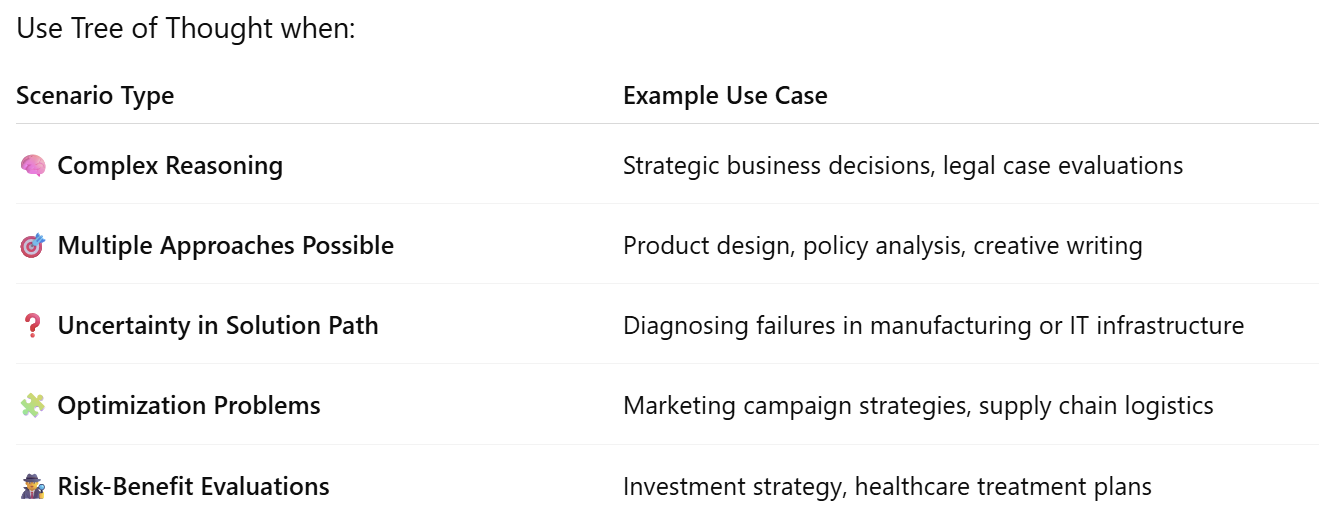

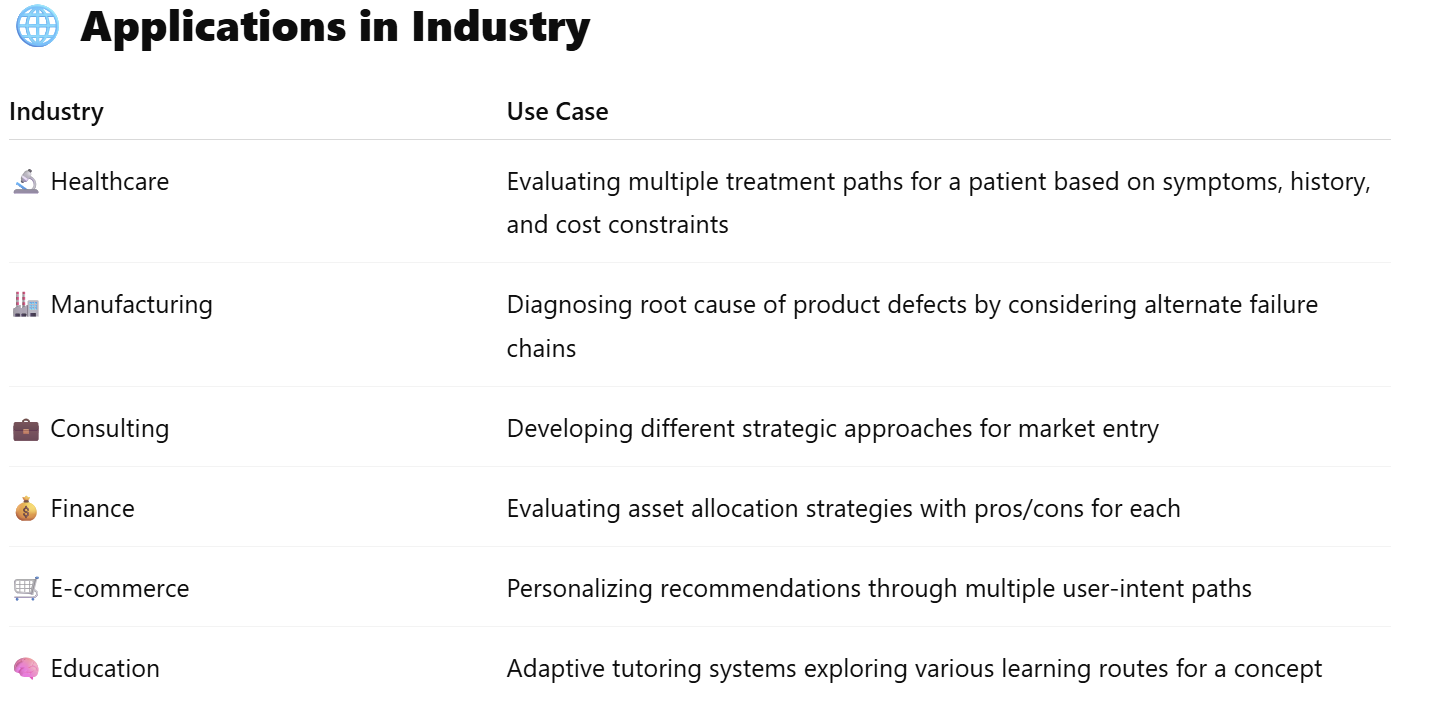

## 💼 Use Case: Personal Finance – Investment Strategy (Age 28, ₹50,000 Income)

In [10]:
# Define a tree of thought approach

prompt = '''You are a financial advisor assisting a 28-year-old individual who earns ₹50,000 per month. He has no liabilities, loans, or dependents, and is highly motivated to grow his wealth.

His primary goal is to start investing but he is confused between Mutual Funds and Direct Equity (Shares). He has a high risk-taking capacity and a long-term investment horizon (10+ years).

---
Using the **Tree of Thought** framework and **Chain of Thought reasoning**, evaluate **three investment paths** to help him make an informed decision.
---

### Path 1: Systematic Investment Plan (SIP) in Mutual Funds
1. Reason step-by-step why SIP is suitable for beginners.
2. Recommend the types of mutual funds:
   - Large Cap, Mid Cap, Index Funds, ELSS
3. Suggest monthly SIP allocation (e.g., 30% income = ₹15,000)
4. Discuss risk, return expectations (CAGR), and liquidity
5. Tools for tracking (e.g., Groww, Zerodha Coin)

---

### Path 2: Direct Equity Investment in Stocks
1. Reason step-by-step when and why equity works for long-term growth.
2. Suggest sectors to target (e.g., IT, Pharma, EV, Banking)
3. Recommend tools for stock analysis and where to invest (Zerodha, Dhan, Smallcase)
4. Show ideal allocation (e.g., 40% income = ₹20,000)
5. Highlight risk of market volatility and need for consistent learning

---

### Path 3: Hybrid Strategy (Mutual Funds + Stocks + Emergency Fund)
1. Justify hybrid planning with asset diversification logic.
2. Suggest split:
   - 30% Mutual Funds
   - 10% Direct Equity
   - 10% Emergency Fund in Liquid/Arbitrage funds
3. Recommend portfolio rebalancing every 6–12 months
4. Describe how this reduces downside risk while leveraging equity upside

---

### Compare All Paths
For each path, summarize:
- Expected 5-year return
- Risk exposure
- Liquidity
- Effort to manage
- Learning required

---

### 📝 Suggest a Final Personalized Financial Plan
Based on the above reasoning, suggest:
- An actionable monthly investment plan
- Fund/stocks/platform examples
- How to track performance
- When to review the plan

Also suggest a learning plan to grow his financial literacy.'''

response = model.invoke([HumanMessage(content=prompt)])

print(response.content)

Okay, let's break down the best investment path for this 28-year-old with ₹50,000 monthly income and a high-risk tolerance, using the Tree of Thought and Chain of Thought approach.

**Understanding the Client:**

*   **Age:** 28 (Long investment horizon)
*   **Income:** ₹50,000 per month
*   **Liabilities:** None
*   **Dependents:** None
*   **Risk Tolerance:** High
*   **Goal:** Wealth Growth
*   **Confusion:** Mutual Funds vs. Direct Equity

**Overall Goal:** To create a long-term investment strategy that maximizes growth while aligning with his risk appetite and level of knowledge.

---

**Path 1: Systematic Investment Plan (SIP) in Mutual Funds**

1.  **Why SIP is Suitable for Beginners (Reasoning):**
    *   **Rupee Cost Averaging:** SIPs invest a fixed amount regularly, buying more units when prices are low and fewer when prices are high. This averages out the purchase price, reducing the impact of market volatility.
    *   **Disciplined Investing:** SIPs enforce regular investi

# 💼 Use Case: Personal Finance Advisory (35–40 years old, High Income, High Debt)

👤 Profile Summary

* Age: 35–40

* Monthly Income: ₹2,00,000

* Existing SIP: ₹10,000

**Loans:**

* Home Loan: ₹40,000/month

* Car Loan: ₹33,000/month

* Education Loan: ₹15,000/month

* Emergency Fund: None

* Risk Appetite: High

* Financial Goal: Wealth creation + Debt optimization + Safety net

In [11]:
# Define a tree of thought approach

prompt = '''You are a professional financial advisor assisting a 37-year-old individual earning ₹2,00,000 per month.

He has no emergency fund, but has the following liabilities:
- Home Loan EMI: ₹40,000
- Car Loan EMI: ₹33,000
- Education Loan EMI: ₹15,000
- Existing SIP: ₹10,000

Despite his current debt obligations, he has a high risk-taking capacity and wants to grow wealth while maintaining liquidity.

---
Using the **Tree of Thought framework** and **step-by-step reasoning (Chain of Thought)**, suggest 3 comprehensive investment & financial management paths:
---

### 🛤️ Path 1: Debt Consolidation + Emergency Fund + Moderate SIP Growth
1. Reason step-by-step why prioritizing financial safety (emergency fund) and reducing high-interest debt is crucial at this age.
2. Allocate ₹20,000/month to build 6-month emergency corpus in liquid/arbitrage funds (goal: ₹5–6 lakhs)
3. Continue existing SIP of ₹10,000 but pause equity expansion until liquidity is restored.
4. Explore consolidating Education/Car loan into lower-interest PL or top-up on Home Loan.
5. Review insurance (term + health)

---

### 📈 Path 2: Aggressive Equity Allocation + Minimal Emergency Planning
1. Justify why high equity exposure is still valid at this age with proper discipline.
2. Allocate ₹30,000–₹35,000 to SIPs across Midcap, Smallcap, and International funds.
3. Allocate ₹10,000 to direct stock investing in high-growth sectors (EV, Green Energy, Banking).
4. Allocate ₹15,000/month to emergency fund (slower pace).
5. Suggest dynamic rebalancing every 6 months and mental preparation for market volatility.

---

### 🔀 Path 3: Hybrid: Debt Optimization + Growth + Liquidity
1. Strategize by balancing 3 pillars: debt payoff, equity growth, and liquidity.
2. Split extra investable income (~₹87,000) as follows:
   - ₹25,000: Emergency fund
   - ₹20,000: SIPs (Large + Mid Cap + ELSS)
   - ₹10,000: Direct Stocks
   - ₹10,000: Additional debt prepayment (Car Loan priority)
   - ₹10,000: Gold or REITs (low correlation assets)
3. Justify each allocation with expected outcome in 3–5 years.
4. Suggest budgeting tool or app to manage and track everything monthly.

---

### 📊 Compare All Paths
Summarize each approach in a table format:
- Liquidity score
- Expected 3/5-year return
- Risk profile
- EMI pressure ease
- Wealth creation potential
- Recommended action for next 6 months

---

### 📝 Final Personalized Financial Roadmap
Based on the reasoning above, suggest:
- Best fit path (or blended approach)
- Monthly allocation plan (with exact ₹ figures)
- Platforms/apps/tools to execute plan
- Suggested timeline to build'''

response = model.invoke([HumanMessage(content=prompt)])

print(response.content)

Okay, here's a comprehensive financial roadmap for the 37-year-old individual earning ₹2,00,000 per month, considering their debt obligations, lack of emergency fund, high-risk appetite, and desire for wealth creation with liquidity. I'll use the Tree of Thought and Chain of Thought framework to present three distinct paths, followed by a comparison and a personalized recommendation.

**Understanding the Situation**

The client earns a good income but is burdened by significant debt and lacks an emergency fund. This creates a vulnerability to unexpected expenses and financial shocks. However, their high-risk appetite allows for potentially faster wealth accumulation through equity investments. The challenge lies in balancing risk, debt management, liquidity, and long-term growth.

## 🛤️ Path 1: Debt Consolidation + Emergency Fund + Moderate SIP Growth

**1. Reasoning:**

*   **Financial Safety First:** At 37, building a solid financial foundation is paramount. An emergency fund acts as

# 🎓 Use Case: Class 12 Student Struggling in Calculus

👤 Student Profile:

* Class: 12th (Board Exam Year – High Stakes)

* Subject of Struggle: Calculus

* Goal: Improve understanding and score well in upcoming Unit Test

* Learning Preference: Open to digital/visual/self-paced learning

In [12]:
# Define a tree of thought approach

prompt = '''You are an expert academic tutor advising a Class 12 student who is struggling with Calculus.

He has a Unit Test in 3 weeks and wants to improve his scores drastically. He is determined but unsure of how to go about learning Calculus effectively.

Using the **Tree of Thought** approach, suggest 3 or more distinct learning paths to improve his Calculus understanding and performance.

---

### Path 1: Concept Mastery via Visual Learning (YouTube + Google)
- Describe a learning plan that leverages visual conceptual understanding.
- Recommend top YouTube channels like:
  - MathTheBeautiful
  - 3Blue1Brown (for intuitive animations)
  - Khan Academy (CBSE-aligned)
- Suggest a daily plan: 2 concepts per day using visual content
- Tools: Digital note-taking app (Notion or OneNote)
- Outcome: Stronger conceptual memory and exam recall

---

### Path 2: Practice-Centric Reinforcement (NCERT + PYQs)
- Focus on problem-solving and paper-based reinforcement
- Recommend:
  - NCERT exercises (solved + unsolved)
  - Previous 5 years’ Unit Test papers
  - Practice sets from RD Sharma or Arihant
- Daily Plan: Solve 10 problems + revise 1 concept per day
- Benefits: Familiarity with board pattern + speed building

---

### Path 3: Hybrid Tutoring (1:1 + Self-Paced)
- Suggest joining a local/online crash course or coaching (e.g., Vedantu, Unacademy)
- Combine it with self-paced review using:
  - Doubtnut app (for on-demand doubt solving)
  - Telegram channels for Class 12 Math notes
- Daily Plan: 1-hour guided + 1-hour solo practice
- Outcome: Confidence boost, custom doubt resolution

---

### Bonus Path 4: Gamified/Community Learning (for Motivation)
- Recommend:
  - Joining a peer group or study community (Discord or school WhatsApp group)
  - Using gamified apps like Cuemath, Photomath, or Brilliant.org
- Track progress weekly with mock quizzes and leaderboard

---

### Final Study Plan Suggestion
Based on the above paths, suggest a **blended roadmap** that includes:
- Week-wise concept breakdown
- Daily routine: 2 hrs/day (1 hr concept + 1 hr problem solving)
- Weekly mock tests
- Stress management tips (e.g., Pomodoro, breaks, exercise)

### Resource List
**YouTube Channels:**
- 3Blue1Brown – Intuition through animation
- Khan Academy – Full Calculus series
- Vedantu Class 12 Maths – CBSE focused
- M-Learning India – Board exam tricks

**Practice Sites:**
- ExamFear.com
- Embibe
- CBSE PYQs Archive (cbseacademic.nic.in)
- Google Search: "Class 12 Calc
'''

response = model.invoke([HumanMessage(content=prompt)])

print(response.content)

Okay, let's break down how you can drastically improve your Calculus Unit Test score in the next three weeks. We'll use the Tree of Thought approach to explore different learning paths and then create a blended roadmap tailored to your needs. Remember, the key is consistent effort and adapting the plan based on what works best for you.

**Understanding Your Current Situation:**

Before we dive into the paths, let's acknowledge that you're feeling unsure. That's completely normal when facing a challenge. But the fact that you're determined is excellent! We'll channel that determination into a structured plan. We need to identify your specific weaknesses in Calculus. Are you struggling with:

*   **Differentiation?** (Chain rule, implicit differentiation, applications)
*   **Integration?** (Substitution, integration by parts, definite integrals, applications)
*   **Differential Equations?** (Solving different types, applications)
*   **Applications of Calculus?** (Maxima/Minima, Area und

# 🧠 Use Case: Tree of Thought for Learning Maths for AI (Beginner)

👤 User Profile:

* Age: 20–40

* Background: Non-math stream (Commerce, Humanities, or weak math in school)

* Goal: Learn Mathematics for Data Science & AI

* Challenge: Doesn’t know about topics like Linear Algebra, Calculus, or Probability

* Motivation: Wants to get a job or build projects in AI/Data Science

* Learning Mode: Beginner-friendly, digital-first, interactive

In [16]:
prompt = '''You are an AI Educator and Math Coach helping a complete beginner learn mathematics required for **Data Science and Artificial Intelligence**.

This learner has not studied math beyond Class 10 and is unaware of topics like **Linear Algebra, Calculus, Probability, or Vectors**.

Their goal is to learn math from scratch in a **fun, simple, and visual way**, and apply it to **machine learning, data analysis, and AI projects**.

---
Using the **Tree of Thought** strategy, suggest at least **three learning paths** based on different learning styles and goals. Include detailed guidance, recommended resources, and weekly learning plans.
---

### 🛤️ Path 1: Visual & Interactive Learning First (No Math Phobia)
1. Explain how to introduce math intuitively using animations, visuals, and storytelling.
2. Recommend resources like:
   - YouTube: 3Blue1Brown (Essence of Linear Algebra, Calculus)
   - Brilliant.org (interactive math for ML)
   - Khan Academy: Precalculus & Linear Algebra for beginners
3. Weekly plan (8 weeks): Start with Sets, Algebra, then Vectors → Matrices → Derivatives → Probability
4. Tools: Desmos, GeoGebra, Notion for math notes
5. Outcome: Learner builds confidence and loves the subject

---

### 🧠 Path 2: Learn-by-Building (Projects before Theory)
1. Suggest starting with simple AI projects and learning math concepts as needed
2. Recommend:
   - ML with Python (e.g., Decision Trees, Regression)
   - Use of NumPy, Pandas with math explanation
   - Projects like: Titanic dataset, House Price Prediction
3. For each project, explain math: mean, std, matrix ops, dot product
4. Tools: Kaggle, Colab, Visual Python
5. Outcome: Math becomes a byproduct of practical curiosity

---

### 🧑‍🏫 Path 3: Foundation-to-Expert Roadmap (Structured Curriculum)
1. Start with Class 9–10 math revision (basic algebra, equations, functions)
2. Gradually cover:
   - Week 1–2: Numbers, Algebra
   - Week 3–4: Vectors, Geometry
   - Week 5–6: Matrices, Determinants
   - Week 7–8: Probability & Statistics
   - Week 9–10: Differentiation & Optimization
3. Explain concepts in real-world terms (Netflix recommendations = matrix multiplication)
4. Recommend course series:
   - Khan Academy: Linear Algebra, Probability
   - Coursera: Mathematics for Machine Learning (Imperial College)
   - MathIsFun.com
5. Outcome: Strong core, job-ready foundation in Data Science Math

---

### 🚀 Bonus Path: AI Coach-Guided Bootcamp (Hand-Holding)
1. Join a bootcamp or mentor-led group that teaches math for ML step-by-step
2. Use platforms like:
   - Fast.ai math prep
   - Bootcamp like 100 Days of ML Code (math + Python blend)
3. Combine daily coaching with small peer groups
4. Weekly review quizzes & doubt-clearing sessions

---

### 📘 Suggest Final Learning Strategy
Based on their personality (visual, project-driven, or structured), recommend:
- Best-fit path (or hybrid)
- 3-month weekly roadmap
- Tools to use (Desmos, YouTube, Colab, Khan Academy)
- One capstone project where they apply all math concepts to an ML problem

---

### 📚 Provide Starter Resource List
- YouTube:
  - 3Blue1Brown: Linear Algebra, Neural Networks, Calculus
  - Khan Academy: Statistics, Probability, Linear Algebra
  - StatQuest with Josh Starmer
- Websites:
  - Brilliant.org (Visual, interactive)
  - MathIsFun.com (Conceptual basics)
  - OpenAI Cookbook (for implementation + math)
- Projects:
  - Titanic Dataset on Kaggle
  - Boston Housing Prediction
  - Rock vs Mine Classification with Logistic Regression'''

response = model.invoke([HumanMessage(content=prompt)])
print(response.content)

Okay, let's break down these learning paths and craft a personalized strategy for our learner. I'll use the Tree of Thought method to analyze each path, identify its strengths and weaknesses, and then synthesize a recommendation.

**Understanding the Learner Profile:**

*   **Complete Beginner:** Math beyond Class 10 is uncharted territory.
*   **Goal-Oriented:** Wants to apply math to Data Science and AI.
*   **Learning Preference:** Fun, simple, and visual.

**Tree of Thought Analysis:**

**🛤️ Path 1: Visual & Interactive Learning First (No Math Phobia)**

*   **Pros:**
    *   Reduces math anxiety through engaging visuals and storytelling.
    *   Builds intuition and conceptual understanding before diving into formulas.
    *   Excellent for visual learners.
*   **Cons:**
    *   May lack the rigor needed for deeper understanding.
    *   Can be time-consuming if the learner gets lost in the visuals without connecting to the underlying mathematical principles.
    *   Might not be 

## Healthcare Use Case

In [8]:
# Define a tree of thought approach
prompt = '''A 65-year-old male patient has Type 2 Diabetes and high LDL cholesterol levels.

The patient has no history of cardiovascular disease but is at elevated risk due to age, metabolic profile, and sedentary lifestyle.

Using the **Tree of Thought** reasoning strategy, explore 3 distinct treatment pathways to manage his cholesterol and overall cardiovascular risk:

---

### 🛤️ Path 1: Lifestyle Modifications + Statins
- Describe a treatment plan that combines lifestyle changes (e.g., diet, exercise, weight control) with the introduction of statins.
- Detail:
  - Recommended statin type and dosage
  - Diet changes (low-carb vs. Mediterranean)
  - Exercise recommendations
  - Expected timeline for LDL reduction
  - Cost estimation
  - Pros and cons of this approach
  - Monitoring requirements (e.g., liver function tests)

---

### 💉 Path 2: Newer Injectable Therapies (e.g., PCSK9 Inhibitors, GLP-1 Agonists)
- Describe a treatment plan that skips statins and introduces newer injectable therapies.
- Detail:
  - Which drugs to consider (e.g., alirocumab, evolocumab, semaglutide)
  - Administration schedule and patient compliance factors
  - Comparative LDL reduction efficacy
  - Insurance and cost burden
  - Risk of side effects
  - Suitability for elderly diabetic patients

---

### 🔀 Path 3: Combination Therapy + Dietician Supervision
- Describe a hybrid approach using moderate statin + GLP-1/PCSK9 + intensive dietician counseling.
- Detail:
  - Schedule of interventions
  - Roles of endocrinologist, cardiologist, and dietician
  - Monitoring plan (HbA1c, lipid profile, weight, BP)
  - Cost vs. benefit analysis
  - Expected outcomes within 6 months

---

💡 At the end, compare the 3 paths in terms of:
- Risk reduction
- Cost
- Patient compliance
- Short-term vs. long-term outcomes

This prompt is intended to simulate a **clinical decision support system** where diverse treatment options are evaluated for explainability and patient-specific tailoring.'''

response = model.invoke([HumanMessage(content=prompt)])

print(response.content)

Okay, let's use the Tree of Thought reasoning strategy to explore these three treatment pathways for our 65-year-old male patient with Type 2 Diabetes and high LDL cholesterol, but no history of cardiovascular disease.

**Overall Goal:** Reduce LDL cholesterol to target levels (as defined by current guidelines - likely <70 mg/dL or a significant percentage reduction from baseline depending on risk assessment) and reduce overall cardiovascular risk.  Secondary goals include better glycemic control and weight management.

**Important Considerations:** Patient preferences, insurance coverage, and adherence capabilities will significantly influence the final decision.
---

### 🛤️ **Path 1: Lifestyle Modifications + Statins**

**Thought Process:** This is often the first-line approach and generally considered the safest and most cost-effective starting point. Lifestyle modifications are crucial regardless of other therapies.

**Treatment Plan:**

*   **Statin Type and Dosage:**  Given the p

In [9]:
# Define a tree of thought approach
prompt = '''A 65-year-old male patient has Type 2 Diabetes and high LDL cholesterol levels.

The patient has no history of cardiovascular disease but is at elevated risk due to age, metabolic profile, and sedentary lifestyle.

Using the **Tree of Thought** reasoning strategy, explore 3 distinct treatment pathways to manage his cholesterol and overall cardiovascular risk:

---

### 🛤️ Path 1: Lifestyle Modifications + Statins
- Describe a treatment plan that combines lifestyle changes (e.g., diet, exercise, weight control) with the introduction of statins.
- Detail:
  - Recommended statin type and dosage
  - Diet changes (low-carb vs. Mediterranean)
  - Exercise recommendations
  - Expected timeline for LDL reduction
  - Cost estimation
  - Pros and cons of this approach
  - Monitoring requirements (e.g., liver function tests)

---

### 💉 Path 2: Newer Injectable Therapies (e.g., PCSK9 Inhibitors, GLP-1 Agonists)
- Describe a treatment plan that skips statins and introduces newer injectable therapies.
- Detail:
  - Which drugs to consider (e.g., alirocumab, evolocumab, semaglutide)
  - Administration schedule and patient compliance factors
  - Comparative LDL reduction efficacy
  - Insurance and cost burden
  - Risk of side effects
  - Suitability for elderly diabetic patients

---

### 🔀 Path 3: Combination Therapy + Dietician Supervision
- Describe a hybrid approach using moderate statin + GLP-1/PCSK9 + intensive dietician counseling.
- Detail:
  - Schedule of interventions
  - Roles of endocrinologist, cardiologist, and dietician
  - Monitoring plan (HbA1c, lipid profile, weight, BP)
  - Cost vs. benefit analysis
  - Expected outcomes within 6 months

---

💡 At the end, compare the 3 paths in terms of:
- Risk reduction
- Cost
- Patient compliance
- Short-term vs. long-term outcomes

This prompt is intended to simulate a **clinical decision support system** where diverse treatment options are evaluated for explainability and patient-specific tailoring.
I want you to combine all the 3 paths and suggest the best possible treatment path'''

response = model.invoke([HumanMessage(content=prompt)])

print(response.content)

Okay, let's use the Tree of Thought approach to analyze these three treatment pathways for the 65-year-old male patient with Type 2 Diabetes and high LDL cholesterol, focusing on a final recommendation that blends the best aspects of each.

**Understanding the Patient's Needs & Priorities**

Before diving into the paths, let's acknowledge some key considerations:

*   **Age:**  65 means we need to be mindful of polypharmacy, potential drug interactions, and patient tolerability.  Aggressive treatments need to be balanced against quality of life.
*   **Type 2 Diabetes:**  This complicates the lipid management.  Insulin resistance and glycemic control directly impact LDL and other lipid parameters.  Treatments that address both diabetes and cholesterol are highly desirable.
*   **High LDL:**  The primary target is LDL reduction, but secondary targets include improving HDL and triglycerides.
*   **Sedentary Lifestyle:**  This is a major modifiable risk factor.  Any plan *must* include str

# 🧠 Supply Chain Problem Solving Use Case

In [17]:
# Define a tree of thought approach
prompt = '''You are a supply chain strategist working with a retail company experiencing increased logistics costs and delivery delays, particularly in Tier-2 and Tier-3 cities.

The objective is to **improve last-mile delivery efficiency** and **reduce operational costs**, while maintaining or improving customer satisfaction.

Using the **Tree of Thought** method, generate at least **three strategic solution paths** to address this challenge.

For each path, include:
- Strategy Name
- Step-by-step reasoning (Chain of Thought)
- Implementation roadmap
- Estimated cost and ROI timeline
- Tools/technologies/platforms involved
- Benefits and risks
- Real-world company example (if available)

---

### Path 1: Route Optimization via AI/ML and Real-Time Tracking
- Use AI for real-time route planning and dynamic delivery windows
- Tools: Google Maps API, Locus, MapMyIndia, AWS Location Services
- Predictive logistics based on weather/traffic data
- Benefit: 10–20% reduction in fuel costs and faster delivery
- Risk: Initial tech investment, change management

---

### Path 2: Hybrid Distribution Model (Local Micro-Hubs)
- Shift from central warehouse model to micro-fulfillment centers near Tier-2 zones
- Use kirana stores/3PL players as last-mile agents
- Partner with Dunzo, Shadowfax, or Porter
- Benefit: 25–30% drop in lead time
- Risk: Complexity in inventory distribution, dependency on local players

---

### Path 3: Delivery Slot Incentivization and Customer Scheduling
- Allow customers to choose delivery windows with incentives (e.g., free delivery for off-peak slots)
- Tools: Delivery slot algorithms like BigBasket or Zepto
- Benefit: Load balancing and better fleet planning
- Risk: Requires customer behavior change, app integration

---

### Path 4 (Optional): Autonomous & Drone-Based Delivery Pilot
- Future-facing pilot for Tier-3 rural areas using drone delivery
- Tools: Skye Air, Redwing Labs, or in-house drone fleet
- High upfront cost but long-term rural access and branding boost
- Risk: Legal compliance, weather issues

---

### Final Output Expected:
For each path, present:
- Timeline for deployment (Quick Win, Mid-Term, Long-Term)
- Technology stack (AI, GPS, Cloud, IoT)
- Team roles required (Logistics head, Tech lead, Regional Ops)
- KPIs to monitor (Cost/km, delivery TAT, success rate)

---

### 📝 Based on the reasoning, recommend:
- Best-fit strategy or hybrid of 2 paths
- Actionable 3-month implementation roadmap
- Budget estimate
- Tools for execution (ERP, OMS, Fleet Tech, APIs)
'''

response = model.invoke([HumanMessage(content=prompt)])

print(response.content)

Okay, here's the Tree of Thought analysis of the last-mile delivery challenges, focusing on efficiency and cost reduction in Tier-2 and Tier-3 cities, along with recommendations.

**Path 1: Route Optimization via AI/ML and Real-Time Tracking**

*   **Strategy Name:** AI-Powered Dynamic Routing and Real-Time Visibility

*   **Step-by-Step Reasoning (Chain of Thought):**

    1.  **Problem:** Inefficient routes contribute to higher fuel costs, longer delivery times, and missed delivery windows, especially in areas with unpredictable traffic patterns.
    2.  **Solution:** Leverage AI/ML algorithms to dynamically optimize delivery routes based on real-time traffic, weather, road closures, and delivery priorities. Integrate real-time tracking to monitor driver progress and identify potential delays.
    3.  **Mechanism:** The system ingests real-time data from multiple sources (GPS, traffic APIs, weather data). AI algorithms analyze this data to generate optimal routes, considering factors

# Step 3: 🧠 What is Self-Consistency in Prompting?

**Concept:** Sample multiple outputs with randomness and choose the most consistent response.

Self-Consistency is a technique where the model is asked to generate multiple reasoning paths (typically via Chain of Thought) with slightly randomized outputs (e.g., via temperature sampling), and then the most consistent answer (i.e., the one that appears most frequently or logically dominates) is selected.

Think of it like voting across multiple minds of the LLM—each one gives an answer, and the consensus becomes the output.

In [22]:
# Self-consistency: sample multiple answers
question = "What are the benefits of renewable energy over fossil fuels?"

answers = []
for _ in range(5):
    # temp_llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=api, temperature=random.uniform(0.5, 0.9))
    response = model.invoke([HumanMessage(content=question)]).content
    answers.append(response)

# Print all responses
for i, answer in enumerate(answers):
    print(f"\n--- Sample {i+1} ---\n{answer}")


--- Sample 1 ---
Renewable energy sources offer a multitude of benefits over fossil fuels, spanning environmental, economic, and social aspects. Here's a breakdown of the key advantages:

**Environmental Benefits:**

*   **Reduced Greenhouse Gas Emissions:** This is the most significant advantage. Renewable energy sources like solar, wind, and hydro produce little to no greenhouse gases (GHGs) during operation. Replacing fossil fuels with renewables is crucial for mitigating climate change and its associated impacts like rising sea levels, extreme weather events, and disruptions to ecosystems.
*   **Improved Air Quality:** Burning fossil fuels releases pollutants such as particulate matter, nitrogen oxides, and sulfur dioxide, which contribute to respiratory problems, cardiovascular diseases, and other health issues. Renewables significantly reduce these harmful air pollutants, leading to cleaner air and improved public health.
*   **Water Conservation:** Many fossil fuel power plants

In [29]:
# Prompt Example: Math (Beginner)
question = "Q: If a train travels 60 km in 45 minutes, what is its average speed in km/h?"
answers = []

for i in range(5):
  response = model.invoke([HumanMessage(content=question)]).content
  answers.append(response)


# Print all responses
for i, answer in enumerate(answers):
    print(f"\n--- Sample {i+1} ---\n{answer}")


--- Sample 1 ---
To find the average speed in km/h, we need to convert the time from minutes to hours.

There are 60 minutes in an hour, so 45 minutes is equal to $\frac{45}{60}$ hours.
$\frac{45}{60} = \frac{3 \times 15}{4 \times 15} = \frac{3}{4}$ hours.

The average speed is the distance traveled divided by the time taken.
Average speed = $\frac{\text{Distance}}{\text{Time}}$
Average speed = $\frac{60 \text{ km}}{\frac{3}{4} \text{ hours}}$
Average speed = $60 \div \frac{3}{4}$
Average speed = $60 \times \frac{4}{3}$
Average speed = $\frac{60 \times 4}{3}$
Average speed = $\frac{240}{3}$
Average speed = $80$ km/h

The average speed of the train is 80 km/h.

Final Answer: The final answer is $\boxed{80}$

--- Sample 2 ---
Let the distance traveled by the train be $d$ km and the time taken be $t$ minutes.
We are given that the train travels 60 km in 45 minutes. So, $d = 60$ km and $t = 45$ minutes.
We want to find the average speed in km/h.
The average speed is given by the formula:


In [26]:
question = '''Act as a legal analyst. Evaluate if this clause protects the company from third-party IP claims:
* "The vendor agrees to indemnify the client from all claims arising due to intellectual property violations."
* Please reason through this clause, give your interpretation, and state if it's sufficient protection.'''

prompt = f"Whats the Best Solution of this case: {question}"

response = model.invoke([HumanMessage(content=prompt)])
print(response.content)

Okay, let's analyze this indemnity clause from a legal analyst perspective.

**Clause:** "The vendor agrees to indemnify the client from all claims arising due to intellectual property violations."

**Interpretation:**

This clause is a straightforward attempt to shift the burden of liability for intellectual property (IP) infringement from the client (the party receiving goods or services) to the vendor (the party providing them).  Let's break it down:

*   **"The vendor agrees to indemnify..."** This establishes a contractual obligation on the vendor to protect the client.  "Indemnify" means to protect or hold harmless; in this context, it means the vendor will cover the client's losses.
*   **"...the client from all claims..."** This indicates the scope of protection. "All claims" suggests a broad scope, potentially covering lawsuits, demands, investigations, settlements, judgments, legal fees, and other expenses.
*   **"...arising due to intellectual property violations."** This sp

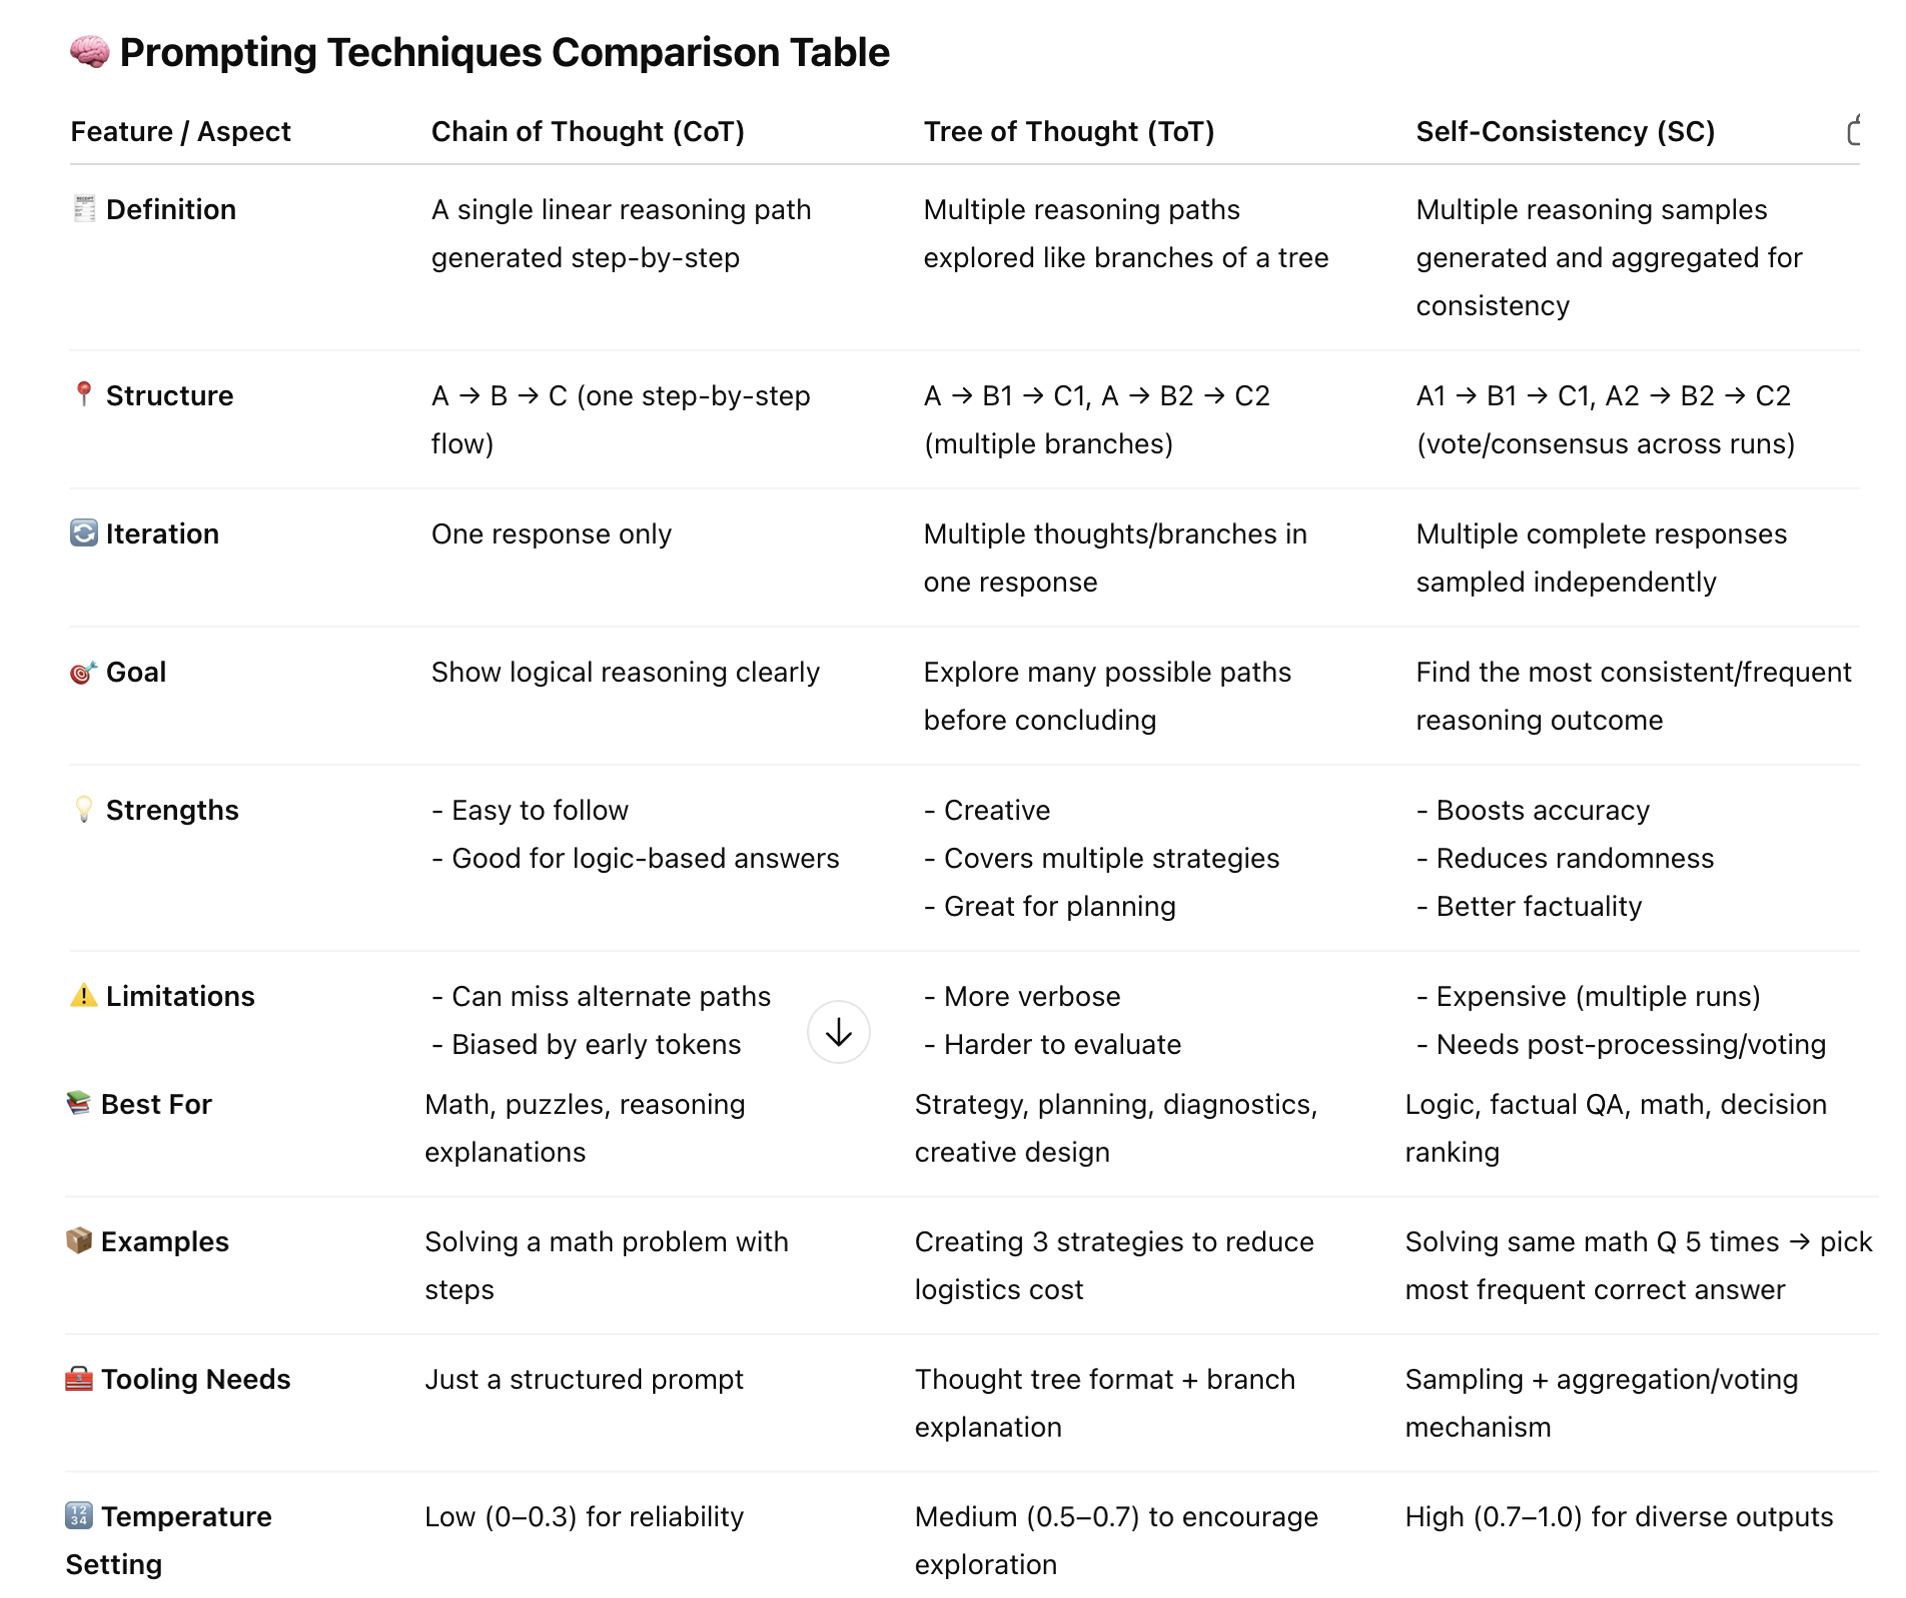

## Summary
- **Tree of Thought:** Generate multiple solution paths.
- **Self-Consistency:** Sample diverse outputs to find the most reliable.
- **Chain of Thought:** Encourage reasoning through intermediate steps.

You can combine these techniques to craft robust prompts for different use-cases.